<a href="https://colab.research.google.com/github/udayameister/Multimodel_GNN/blob/main/EDA_adni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the diagnostic summary data
file_path = "/content/DXSUM_PDXCONV_17Jul2024.csv"
diagnostic_data = pd.read_csv(file_path)

# Display the first few rows of the data
print(diagnostic_data.head())


   PHASE        PTID  RID VISCODE VISCODE2    EXAMDATE  DIAGNOSIS  DXNORM  \
0  ADNI1  011_S_0002    2      bl       bl  2005-09-29        1.0     1.0   
1  ADNI1  011_S_0003    3      bl       bl  2005-09-30        3.0    -4.0   
2  ADNI1  011_S_0005    5      bl       bl  2005-09-30        1.0     1.0   
3  ADNI1  011_S_0008    8      bl       bl  2005-09-30        1.0     1.0   
4  ADNI1  022_S_0007    7      bl       bl  2005-10-06        3.0    -4.0   

   DXNODEP  DXMCI  ... DXODES  DXCONFID  ID  SITEID    USERDATE  USERDATE2  \
0     -4.0   -4.0  ...   -4.0       4.0   2     107  2005-10-01        NaN   
1     -4.0   -4.0  ...   -4.0       3.0   4     107  2005-10-01        NaN   
2     -4.0   -4.0  ...   -4.0       4.0   6     107  2005-10-01        NaN   
3     -4.0   -4.0  ...   -4.0       3.0   8     107  2005-10-01        NaN   
4     -4.0   -4.0  ...   -4.0       4.0  10      10  2005-10-06        NaN   

   DD_CRF_VERSION_LABEL  LANGUAGE_CODE HAS_QC_ERROR           update

In [3]:
# Assuming the column is named 'DIAGNOSIS' (adjust based on the output above)
# Convert the column to categorical type
if 'DIAGNOSIS' in diagnostic_data.columns:
    diagnostic_data['DIAGNOSIS'] = diagnostic_data['DIAGNOSIS'].astype('category')
else:
    print("Column 'Diagnosis' not found. Please check your data.")


In [5]:
# Check for missing values
print(diagnostic_data.isnull().sum())

# Fill or drop missing values as necessary
diagnostic_data.fillna(method='ffill', inplace=True)

# Convert relevant columns to categorical types if needed
diagnostic_data['DIAGNOSIS'] = diagnostic_data['DIAGNOSIS'].astype('category')


PHASE                       0
PTID                        0
RID                         0
VISCODE                     0
VISCODE2                    0
EXAMDATE                    0
DIAGNOSIS                   0
DXNORM                      0
DXNODEP                     0
DXMCI                       0
DXMDES                      0
DXMPTR1                     0
DXMPTR2                     0
DXMPTR3                     0
DXMPTR4                     0
DXMPTR5                     0
DXMPTR6                     0
DXMDUE                      0
DXMOTHET                    0
DXDSEV                      0
DXDDUE                   3868
DXAD                        0
DXAPP                       0
DXAPROB                     0
DXAPOSS                     0
DXPARK                      0
DXPDES                      0
DXPCOG                      0
DXPATYP                     0
DXDEP                    4343
DXOTHDEM                    0
DXODES                      0
DXCONFID                    0
ID        

DIAGNOSIS       1.0       2.0       3.0
PHASE                                  
ADNI1      0.292141  0.415202  0.292658
ADNI2      0.344913  0.459884  0.195204
ADNI3      0.513629  0.359455  0.126917
ADNI4      0.543605  0.331395  0.125000
ADNIGO     0.187368  0.680000  0.132632


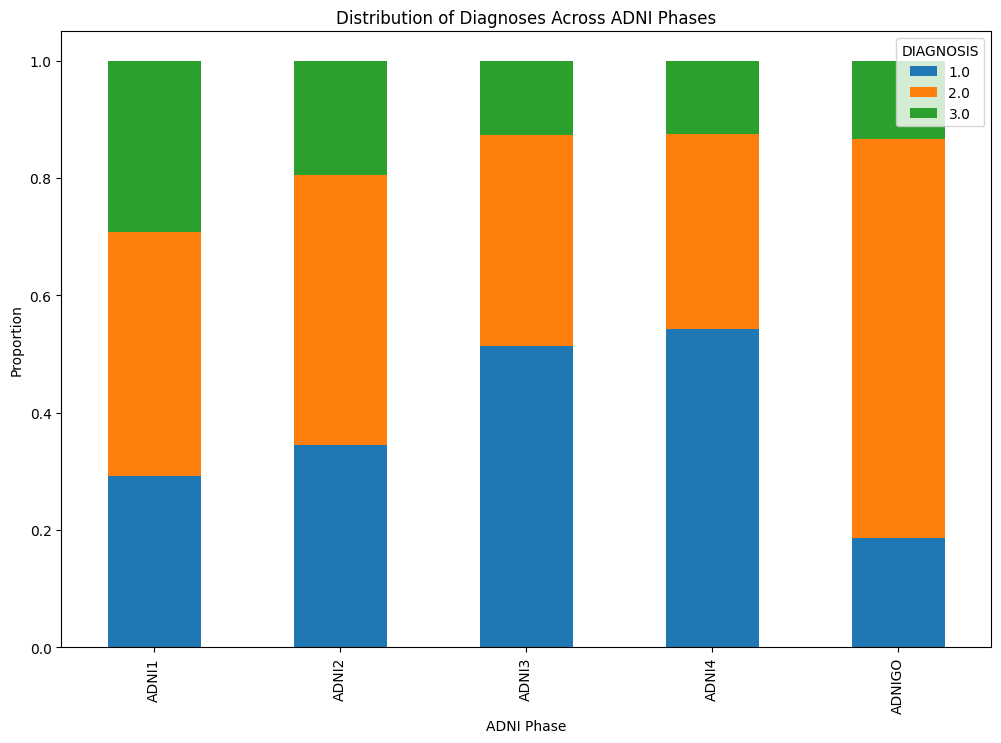

In [9]:
import pandas as pd
import matplotlib.pyplot as plt # Import matplotlib

# Summary statistics for diagnosis
diagnostic_summary = diagnostic_data.groupby('PHASE')['DIAGNOSIS'].value_counts(normalize=True).unstack().fillna(0)
print(diagnostic_summary)

# Plot the distribution of diagnoses
diagnostic_summary.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Diagnoses Across ADNI Phases') # Now plt is defined and can be used
plt.xlabel('ADNI Phase')
plt.ylabel('Proportion')
plt.legend(title='DIAGNOSIS')
plt.show()

Next_Diagnosis       1.0       2.0       3.0
DIAGNOSIS                                   
1.0             0.953750  0.045000  0.001250
2.0             0.029039  0.907013  0.063948
3.0             0.000000  0.026439  0.973561


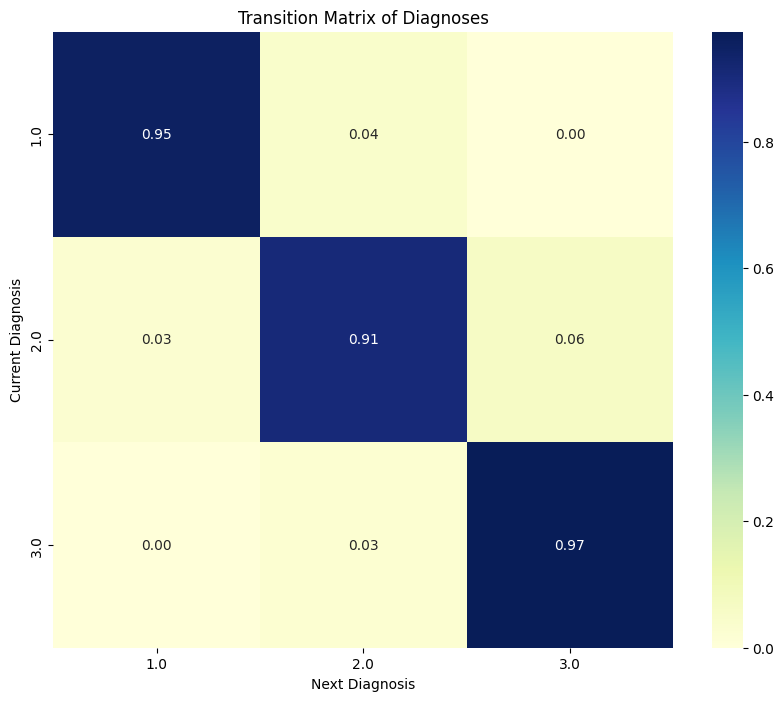

In [13]:
import seaborn as sns
# Sort data by subject and visit date
diagnostic_data = diagnostic_data.sort_values(by=['PTID', 'EXAMDATE'])

# Create a column for the next diagnosis
diagnostic_data['Next_Diagnosis'] = diagnostic_data.groupby('PTID')['DIAGNOSIS'].shift(-1)

# Drop rows where next diagnosis is missing (i.e., last visit)
diagnostic_data = diagnostic_data.dropna(subset=['Next_Diagnosis'])

# Count transitions
transitions = diagnostic_data.groupby(['DIAGNOSIS', 'Next_Diagnosis']).size().unstack().fillna(0)

# Normalize transitions to get proportions
transitions = transitions.div(transitions.sum(axis=1), axis=0)
print(transitions)

# Plot transition matrix
plt.figure(figsize=(10, 8))
sns.heatmap(transitions, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Transition Matrix of Diagnoses')
plt.xlabel('Next Diagnosis')
plt.ylabel('Current Diagnosis')
plt.show()


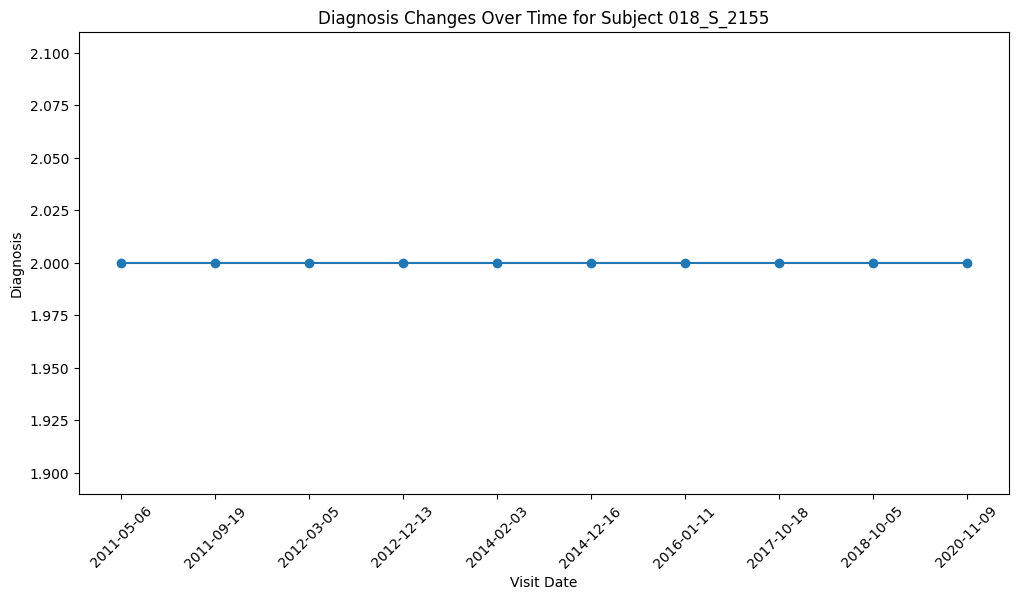

In [23]:
# Example: Plot longitudinal diagnosis changes for a random subject
import random

random_subject = random.choice(diagnostic_data['PTID'].unique())
subject_data = diagnostic_data[diagnostic_data['PTID'] == random_subject]

# Plot diagnosis changes over time for the subject
plt.figure(figsize=(12, 6))
plt.plot(subject_data['EXAMDATE'], subject_data['DIAGNOSIS'], marker='o')
plt.title(f'Diagnosis Changes Over Time for Subject {random_subject}')
plt.xlabel('Visit Date')
plt.ylabel('Diagnosis')
plt.xticks(rotation=45)
plt.show()


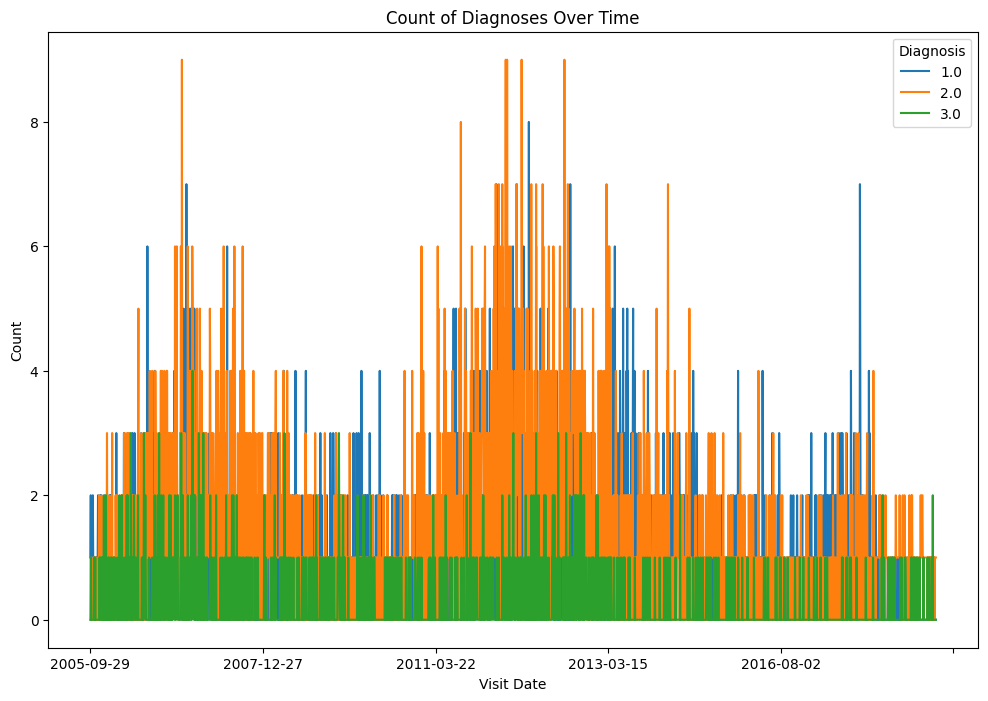

In [24]:
# Count of diagnoses over time
diagnosis_over_time = diagnostic_data.groupby(['EXAMDATE', 'DIAGNOSIS']).size().unstack().fillna(0)

# Plot diagnosis count over time
diagnosis_over_time.plot(kind='line', figsize=(12, 8))
plt.title('Count of Diagnoses Over Time')
plt.xlabel('Visit Date')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.show()


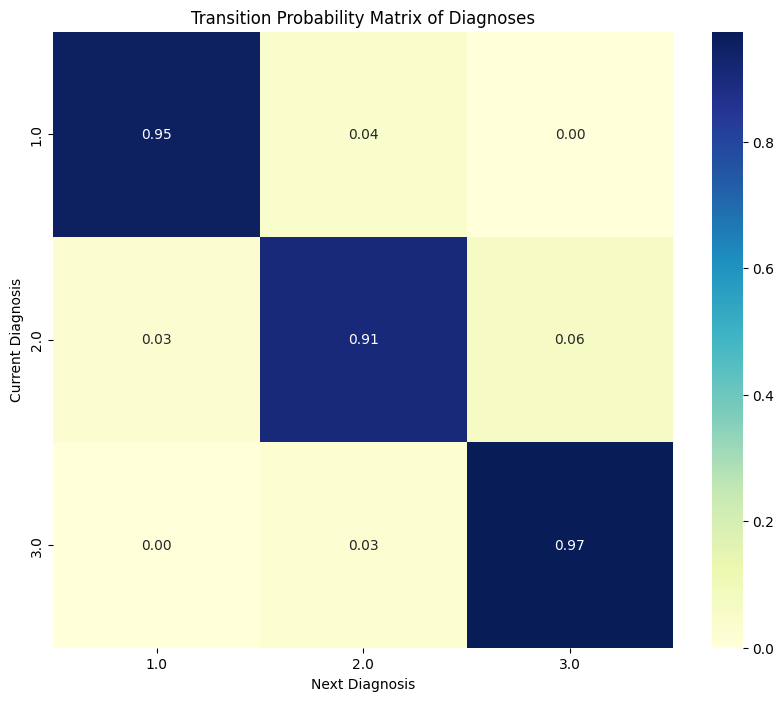

In [25]:
# Transition probability matrix
transition_prob_matrix = transitions / transitions.sum(axis=1).values[:, None]

# Plot transition probability matrix
plt.figure(figsize=(10, 8))
sns.heatmap(transition_prob_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Transition Probability Matrix of Diagnoses')
plt.xlabel('Next Diagnosis')
plt.ylabel('Current Diagnosis')
plt.show()
